In [1]:
import pandas as pd
import random
from datetime import datetime

# Define lists for random data
titles = [f"Show_{i}" for i in range(1, 100)] + [f"Movie_{i}" for i in range(1, 150)]
types = ['Movie', 'TV Show']
genres = ['Drama', 'Comedy', 'Action', 'Documentary', 'Sci-Fi', 'Romance', 'Thriller']
countries = ['USA', 'India', 'UK', 'Japan', 'Brazil', 'Canada', 'France']
ratings = ['PG', 'PG-13', 'R', 'TV-MA', 'TV-14', 'TV-PG']

# Generate 250 rows
data = []
for i in range(250):
    title = random.choice(titles)
    content_type = random.choice(types)
    genre = random.choice(genres) if random.random() > 0.05 else ''  # 5% missing
    release_year = random.randint(2000, 2025) if random.random() > 0.05 else ''  # 5% missing
    rating = random.choice(ratings)
    duration = random.randint(20, 180) if content_type == 'Movie' else random.randint(1, 10)  # Movies: minutes, TV Shows: seasons
    country = random.choice(countries) if random.random() > 0.05 else ''  # 5% missing
    viewer_rating = round(random.uniform(1.0, 10.0), 1) if random.random() > 0.1 else ''  # 10% missing
    data.append([title, content_type, genre, release_year, rating, duration, country, viewer_rating])

# Create DataFrame
df = pd.DataFrame(data, columns=['Title', 'Type', 'Genre', 'Release_Year', 'Rating', 'Duration', 'Country', 'Viewer_Rating'])

# Save to CSV
df.to_csv('netflix_data.csv', index=False)
print("Generated netflix_data.csv with 250 rows")

Generated netflix_data.csv with 250 rows


In [2]:
# Load data
df = pd.read_csv('netflix_data.csv')

# Display first 5 rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

      Title     Type     Genre  Release_Year Rating  Duration Country  \
0  Movie_19  TV Show     Drama        2025.0      R         5  Canada   
1   Show_12  TV Show     Drama        2016.0  TV-MA         4   Japan   
2    Show_4  TV Show    Comedy        2008.0      R         8      UK   
3   Show_34    Movie  Thriller        2005.0  TV-14        84      UK   
4  Movie_55    Movie   Romance        2002.0  PG-13        21  Brazil   

   Viewer_Rating  
0            2.7  
1            7.5  
2            9.3  
3            NaN  
4            1.5  
Title             0
Type              0
Genre            11
Release_Year      5
Rating            0
Duration          0
Country          11
Viewer_Rating    27
dtype: int64


In [3]:
# Fill missing Genre with 'Unknown'
df['Genre'] = df['Genre'].fillna('Unknown')

# Fill missing Release_Year with median
df['Release_Year'] = df['Release_Year'].fillna(df['Release_Year'].median())

# Fill missing Country with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

# Fill missing Viewer_Rating with mean
df['Viewer_Rating'] = df['Viewer_Rating'].fillna(df['Viewer_Rating'].mean())

# Verify no missing values
print(df.isnull().sum())

Title            0
Type             0
Genre            0
Release_Year     0
Rating           0
Duration         0
Country          0
Viewer_Rating    0
dtype: int64


In [4]:
# Remove duplicate titles
df = df.drop_duplicates(subset='Title', keep='first')
print(f"Rows after removing duplicates: {len(df)}")

Rows after removing duplicates: 159


In [5]:
df['Release_Year'] = df['Release_Year'].astype(int)

In [6]:
# Summary statistics
print(df.describe(include='all'))

           Title   Type     Genre  Release_Year Rating    Duration Country  \
count        159    159       159    159.000000    159  159.000000     159   
unique       159      2         8           NaN      6         NaN       8   
top     Movie_19  Movie  Thriller           NaN     PG         NaN  Brazil   
freq           1     86        28           NaN     33         NaN      29   
mean         NaN    NaN       NaN   2013.081761    NaN   56.345912     NaN   
std          NaN    NaN       NaN      7.396517    NaN   58.775801     NaN   
min          NaN    NaN       NaN   2000.000000    NaN    1.000000     NaN   
25%          NaN    NaN       NaN   2007.000000    NaN    6.000000     NaN   
50%          NaN    NaN       NaN   2012.000000    NaN   32.000000     NaN   
75%          NaN    NaN       NaN   2020.000000    NaN  111.500000     NaN   
max          NaN    NaN       NaN   2025.000000    NaN  176.000000     NaN   

        Viewer_Rating  
count      159.000000  
unique         

In [7]:
# Genre distribution
genre_counts = df['Genre'].value_counts()
print("Genre Distribution:\n", genre_counts)

# Average viewer rating by country
country_ratings = df.groupby('Country')['Viewer_Rating'].mean().sort_values(ascending=False)
print("Average Viewer Rating by Country:\n", country_ratings)

Genre Distribution:
 Genre
Thriller       28
Documentary    27
Drama          25
Romance        24
Action         20
Sci-Fi         15
Comedy         13
Unknown         7
Name: count, dtype: int64
Average Viewer Rating by Country:
 Country
UK         6.755917
India      6.363229
USA        6.070139
Unknown    5.962500
Japan      5.780169
France     5.697524
Canada     5.688845
Brazil     5.044828
Name: Viewer_Rating, dtype: float64


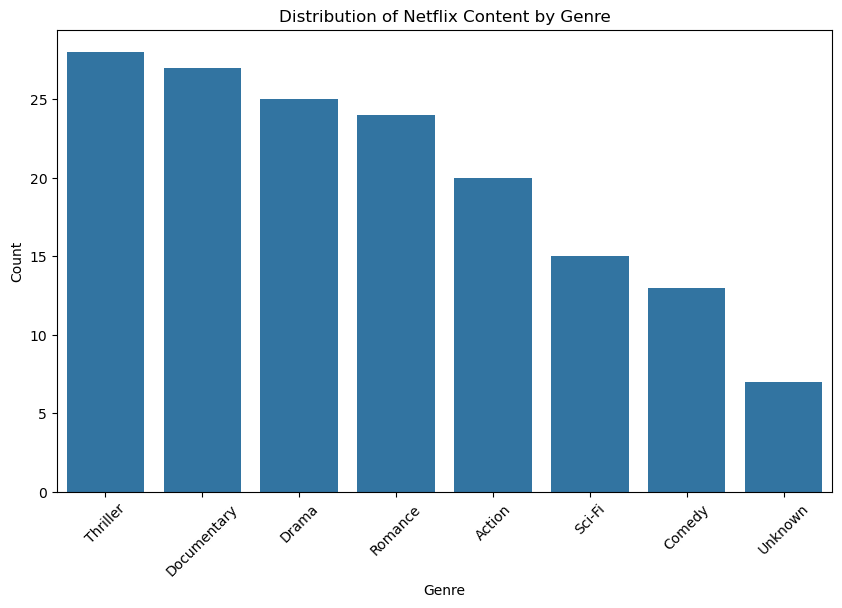

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', order=genre_counts.index)
plt.title('Distribution of Netflix Content by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('genre_distribution.png')
plt.show()

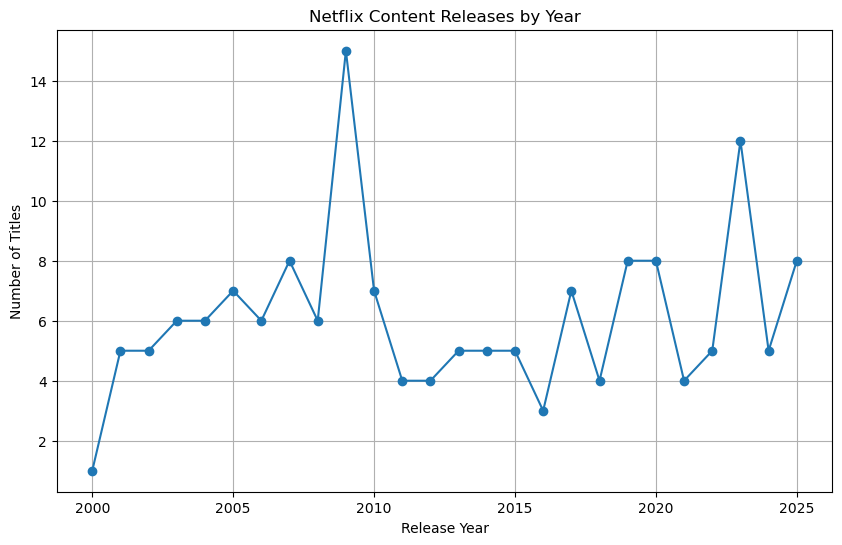

In [9]:
yearly_counts = df['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Netflix Content Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.savefig('release_trend.png')
plt.show()

In [10]:
import plotly.express as px

fig = px.box(df, x='Country', y='Viewer_Rating', title='Viewer Ratings by Country')
fig.update_layout(xaxis_title='Country', yaxis_title='Viewer Rating (1-10)')
fig.write_html('ratings_by_country.html')
fig.show()

In [2]:
! pip install dash